# Analyzing PBMCs of Covid patients and healthy controls

## Load libraries

In [356]:
import scanpy as sc 
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


# Load the data

Make sure we are in the correct working directory

In [357]:
os.getcwd() #get working directory

'C:\\Users\\Nastavnik\\S3_project\\DDD_disk'

In [358]:
os.chdir('C:\\Users\\Nastavnik\\S3_project\\DDD_disk') # change working directory

In [359]:
os.getcwd()

'C:\\Users\\Nastavnik\\S3_project\\DDD_disk'

In [360]:
# Load cont matrices for all sample - cells by genes
adata_cov1 = sc.read_10x_h5("data/nCoV_PBMC_1.h5")
adata_cov2 = sc.read_10x_h5("data/nCoV_PBMC_15.h5")
adata_cov3 = sc.read_10x_h5("data/nCoV_PBMC_17.h5")
adata_norm1 = sc.read_10x_h5("data/Normal_PBMC_13.h5")
adata_norm2 = sc.read_10x_h5("data/Normal_PBMC_14.h5")
adata_norm3 = sc.read_10x_h5("data/Normal_PBMC_5.h5")

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\readwrite.py:281: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\readwrite.py:281: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site

In [361]:
adata_cov1.var_names_make_unique()
adata_cov2.var_names_make_unique()
adata_cov3.var_names_make_unique()
adata_norm1.var_names_make_unique()
adata_norm2.var_names_make_unique()
adata_norm3.var_names_make_unique()

In [362]:
adata_cov1.obs["sample"] = "cov1"
adata_cov2.obs["sample"] = "cov2"
adata_cov3.obs["sample"] = "cov3"
adata_norm1.obs["sample"] = "norm1"
adata_norm2.obs["sample"] = "norm2"
adata_norm3.obs["sample"] = "norm3"

In [363]:
adata_cov1.obs["condition"] = "covid"
adata_cov2.obs["condition"] = "covid"
adata_cov3.obs["condition"] = "covid"
adata_norm1.obs["condition"] = "control"
adata_norm2.obs["condition"] = "control"
adata_norm3.obs["condition"] = "control"

Concatenate all objects (combine adata objects into one)

In [364]:
adata = adata_cov1.concatenate(adata_cov2, adata_cov3, adata_norm1, adata_norm2, adata_norm3)

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [365]:
adata

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'sample', 'condition', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [366]:
adata.obs

,sample,condition,batch
AGGGTCCCATGACCCG-1-0,cov1,covid,0
TACCCACAGCGGGTTA-1-0,cov1,covid,0
CCCAACTTCATATGGC-1-0,cov1,covid,0
TCAAGTGTCCGAACGC-1-0,cov1,covid,0
ATTCCTAGTGACTGTT-1-0,cov1,covid,0
...,...,...,...
GTCACTCCACTCTCGT-5-5,norm3,control,5
TGACCCTGTAGATTAG-5-5,norm3,control,5
TCCTTTCGTAAGGCCA-5-5,norm3,control,5
CTACCCACACGACCTG-5-5,norm3,control,5


### Data QC

In [367]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

In [368]:
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]

In [369]:
adata.X = adata.X.toarray()

In [370]:
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

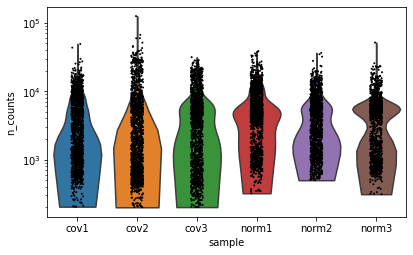

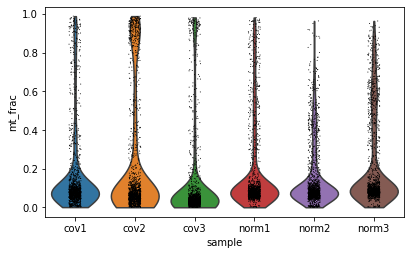

In [371]:
# Quality control - plot QC metrics
#Sample quality plots
t1 = sc.pl.violin(adata, 'n_counts', groupby='sample', size=2, log=True, cut=0)
t2 = sc.pl.violin(adata, 'mt_frac', groupby='sample')

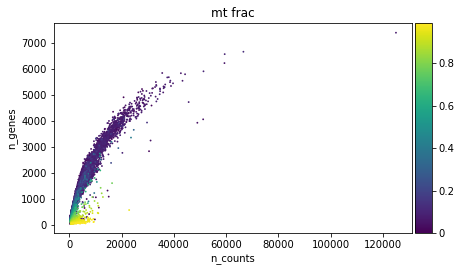

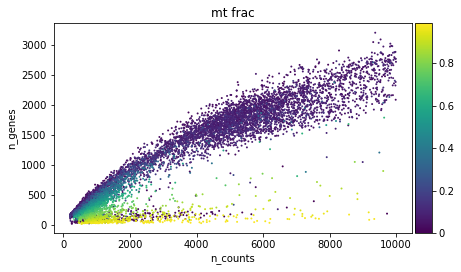

In [372]:
#Data quality summary plots
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='mt_frac')
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<10000], 'n_counts', 'n_genes', color='mt_frac')

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


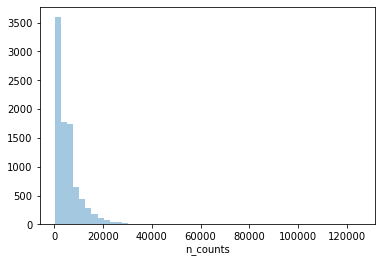

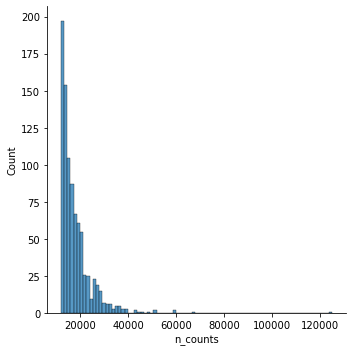

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


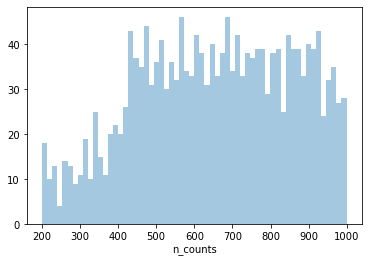

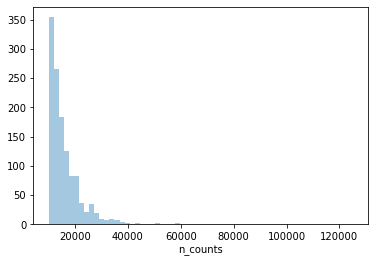

In [373]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p3_1 = sb.displot(adata.obs['n_counts'][adata.obs['n_counts']>12000], kde=False)
plt.show()
    
p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<1000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [374]:
# n_counts_upper = 32000
# n_counts_upper = 25000
# n_counts_lower = 450

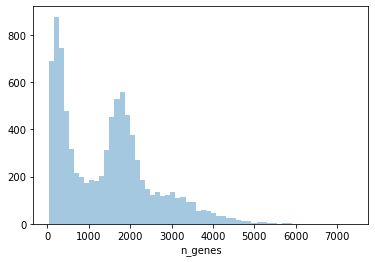

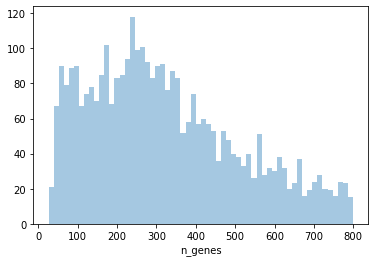

In [375]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes']<800], kde=False, bins=60)
plt.show()



In [376]:
# n_genes_lower = 150
# n_genes_higher = 200


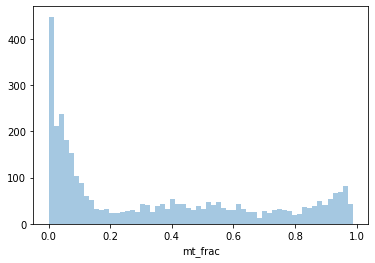

In [377]:
p8 = sb.distplot(adata.obs['mt_frac'][adata.obs['n_genes']<800], kde=False, bins=60)
plt.show()

In [378]:
# mt_frac_upper = 0.2

In [379]:
adata_subset = adata[adata.obs['sample']=='norm2',:]

##### NORM_2

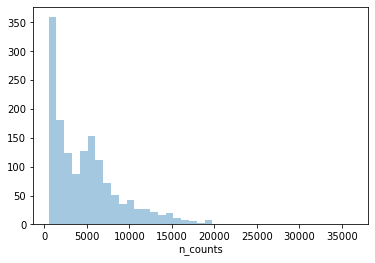

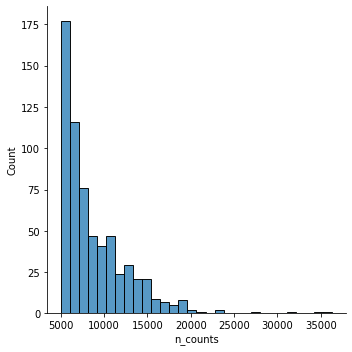

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


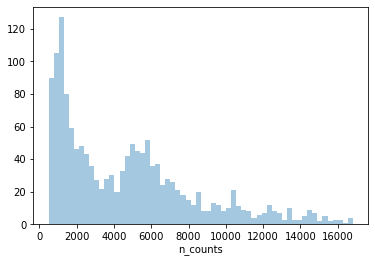

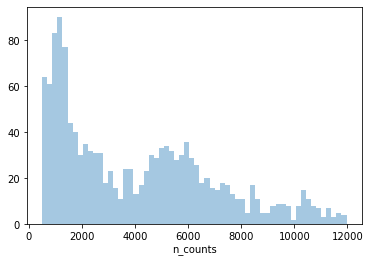

In [380]:
#Thresholding decision: counts
p3 = sb.distplot(adata_subset.obs['n_counts'], kde=False)
plt.show()

p3_1 = sb.displot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']>5000], kde=False)
plt.show()
    
p4 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']<17000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']<12000], kde=False, bins=60)
plt.show()

In [381]:
# NORM_2
# n_upper_count_2 = 4000
# n_lower_count_2 = 18000


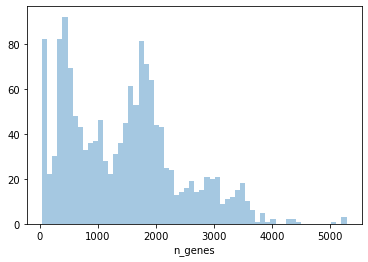

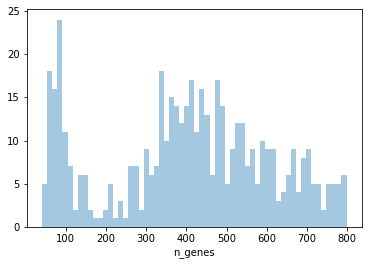

In [382]:
#Thresholding decision: genes
p6 = sb.distplot(adata_subset.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata_subset.obs['n_genes'][adata_subset.obs['n_genes']<800], kde=False, bins=60)
plt.show()

In [383]:
# n_genes_lower_2 = 350
# n_genes_higher_2 = 75

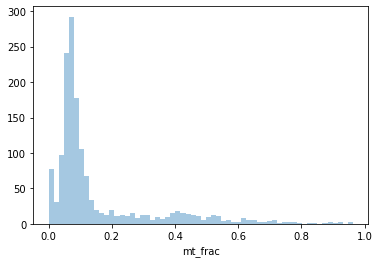

In [384]:
p8 = sb.distplot(adata_subset.obs['mt_frac'], kde=False, bins=60)
plt.show()

In [385]:
# NORM_2
# mt_frac_lower = 0.3

##### NORM_3

In [386]:
adata_subset_2 = adata[adata.obs['sample']=='norm3',:]

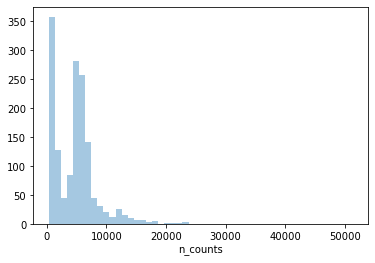

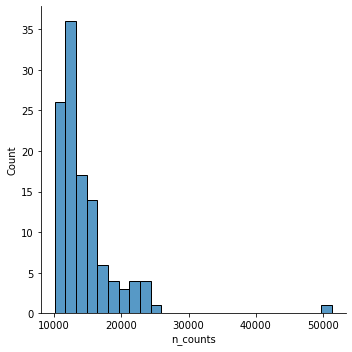

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


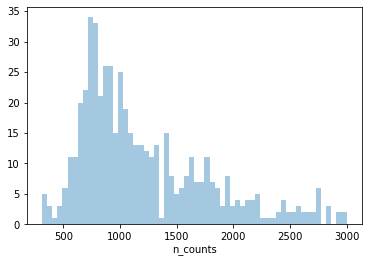

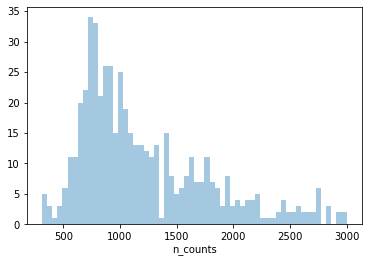

In [387]:
#Thresholding decision: counts
p3 = sb.distplot(adata_subset_2.obs['n_counts'], kde=False)
plt.show()

p3_1 = sb.displot(adata_subset_2.obs['n_counts'][adata_subset_2.obs['n_counts']>10000], kde=False)
plt.show()
    
p4 = sb.distplot(adata_subset_2.obs['n_counts'][adata_subset_2.obs['n_counts']<3000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata_subset_2.obs['n_counts'][adata_subset_2.obs['n_counts']<3000], kde=False, bins=60)
plt.show()

In [388]:
# NORM_3
# n_upper_count_3 = 3000
# n_lower_count_3 = 20000 


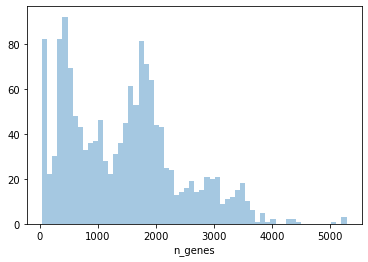

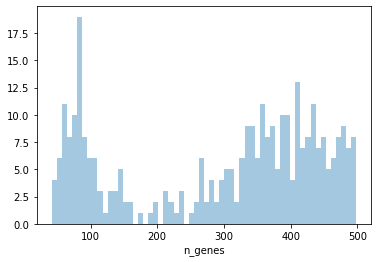

In [389]:
#Thresholding decision: genes
p6 = sb.distplot(adata_subset.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata_subset.obs['n_genes'][adata_subset.obs['n_genes']<500], kde=False, bins=60)
plt.show()

In [390]:
# n_genes_lower_3 = 350
# n_genes_higher_3 = 100

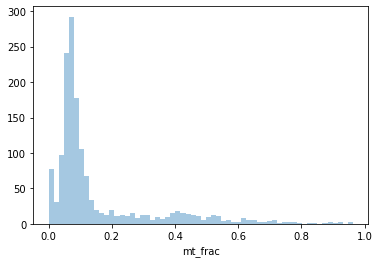

In [391]:
p8 = sb.distplot(adata_subset.obs['mt_frac'], kde=False, bins=60)
plt.show()

In [392]:
# NORM_3
# mt_frac_lower = 0.3

In [393]:
adata_subset

View of AnnData object with n_obs × n_vars = 1500 × 33538
    obs: 'sample', 'condition', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'sample_colors'

In [121]:
adata_subset.obs['n_counts']

AGGGTCCCATGACCCG-1-0     7698.0
TACCCACAGCGGGTTA-1-0    13416.0
CCCAACTTCATATGGC-1-0    16498.0
TCAAGTGTCCGAACGC-1-0     1425.0
ATTCCTAGTGACTGTT-1-0     7535.0
                         ...   
ACTCCCAAGATGCGAC-1-0     7616.0
AGTGCCGGTTGGTAGG-1-0      472.0
CCCATTGAGGCCCGTT-1-0      770.0
CAACGGCGTCGGCTAC-1-0     8308.0
ATCACTTGTAGGCAAC-1-0      454.0
Name: n_counts, Length: 1500, dtype: float32

In [122]:
adata.obs['n_counts']

AGGGTCCCATGACCCG-1-0     7698.0
TACCCACAGCGGGTTA-1-0    13416.0
CCCAACTTCATATGGC-1-0    16498.0
TCAAGTGTCCGAACGC-1-0     1425.0
ATTCCTAGTGACTGTT-1-0     7535.0
                         ...   
GTCACTCCACTCTCGT-5-5     6479.0
TGACCCTGTAGATTAG-5-5     5335.0
TCCTTTCGTAAGGCCA-5-5     4596.0
CTACCCACACGACCTG-5-5     6766.0
CTGAGCGTCAAACCTG-5-5     3393.0
Name: n_counts, Length: 9000, dtype: float32

In [ ]:
# cov1
# n_count_upper_1
# n_count_upper_2

# n_count_lower_1
# n_count_lower_2

# n_genes_lower

# mt_frac